In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

import seaborn as sns; sns.set(style="ticks", color_codes=True)

In [15]:
# This dataset was introduced by the British statistician and biologist Sir Ronald Fisher 
# in his 1936 paper The use of multiple measurements in taxonomic problems
# This dataset is openly available at UCI Machine Learning Repository


# The iris dataset contains measurements for 150 iris flowers from three different species.

# The three classes in the Iris dataset:

#    Iris-setosa (n=50)
#    Iris-versicolor (n=50)
#    Iris-virginica (n=50)

# The four features of the Iris dataset:

#    sepal length in cm
#    sepal width in cm
#    petal length in cm
#    petal width in cm

## Get the data

#**Use seaborn to get the iris data by using: iris = sns.load_dataset('iris') **

iris_data = datasets.load_iris()


iris_df = pd.DataFrame(data= np.c_[iris_data['data'], iris_data['target']],
                       columns= iris_data['feature_names'] + ['target'])
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<Figure size 432x288 with 0 Axes>

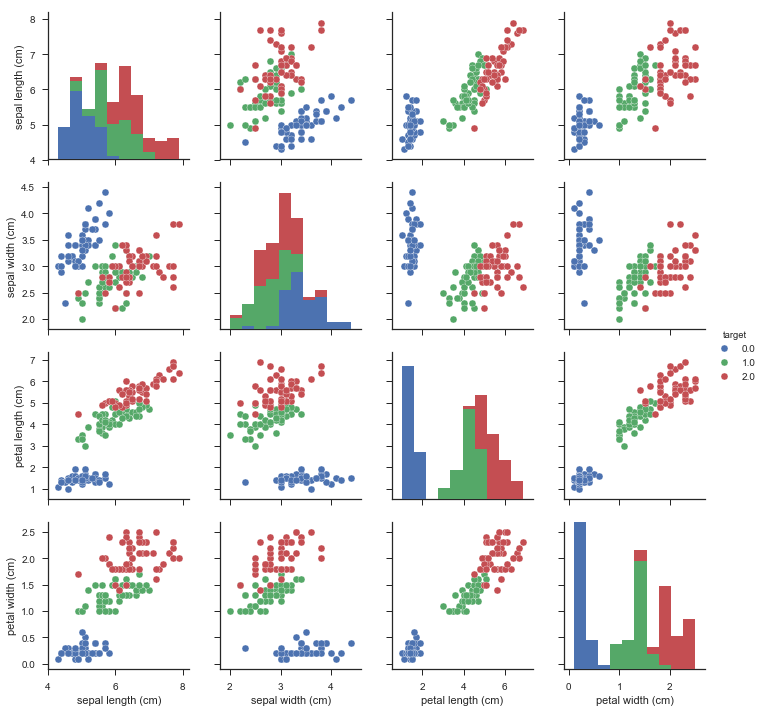

In [16]:
plt.figure()
sns.pairplot(iris_df, vars=iris_data['feature_names'], hue="target")
plt.show()

In [3]:
#iris_sns = sns.load_dataset("iris")
#sns.pairplot(iris_sns, hue='species')
#plt.show()

In [4]:
X0 = iris_data['data'][:,0] #sepal length in cm
X1 = iris_data['data'][:,1] #sepal width in cm
X2 = iris_data['data'][:,2] #petal length in cm
X3 = iris_data['data'][:,3] #petal width in cm

# KMEANS

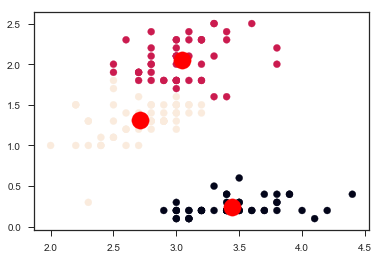

In [13]:
from sklearn.cluster import KMeans

X = iris_data['data'][:,(1,3)]  #length, width
Y = (iris_data['target'] == 2).astype(np.float64)

model = KMeans(n_clusters=3)
Y_pred = model.fit_predict(X)

fig = plt.figure()
plt.subplot(111)
plt.scatter(X[:, 0], X[:, 1], c=Y_pred)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=300, c='red')

plt.show()



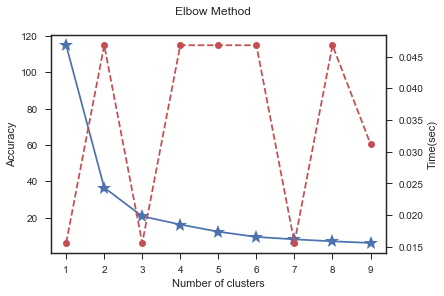

In [6]:
import time

clusters = range(1,10)
accuracy = []
time_list = []
for i in clusters:
    t0 = time.time()
    model = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    model.fit(X)
    t1 = time.time()
    accuracy.append(model.inertia_)
    time_list.append(t1-t0)
    
fig = plt.figure()

ax = fig.add_subplot(111) 
ax.plot(clusters, accuracy, 'b*-', markersize=15)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Number of clusters')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Time(sec)')
ax2.plot(clusters, time_list, 'ro--')

fig.suptitle('Elbow Method')
plt.show()

# SVM

In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

#X=iris_df[iris_data['feature_names']]
#Y=iris_df['target']
X = iris_data['data']
Y = (iris_data['target']).astype(np.float64)
X0, X1, Y0, Y1 = train_test_split(X,Y,test_size=0.30)

model = SVC()
model.fit(X0, Y0)
Y_pred = model.predict(X1)

print(confusion_matrix(Y1,Y_pred))
print(classification_report(Y1,Y_pred))

[[11  0  0]
 [ 0 13  0]
 [ 0  1 20]]
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        11
        1.0       0.93      1.00      0.96        13
        2.0       1.00      0.95      0.98        21

avg / total       0.98      0.98      0.98        45



[1. 0. 0. 2. 2. 1. 2. 0. 0. 0. 1. 2. 2. 2. 2. 2. 2. 1. 2. 1. 2. 2. 1. 1.
 0. 1. 0. 0. 2. 0. 0. 1. 2. 1. 1. 2. 2. 2. 0. 2. 2. 1. 2. 1. 2.]
[1. 0. 0. 2. 2. 1. 2. 0. 0. 0. 1. 2. 2. 2. 2. 2. 2. 1. 2. 1. 2. 2. 1. 1.
 0. 1. 0. 0. 2. 0. 0. 1. 2. 1. 1. 1. 2. 2. 0. 2. 2. 1. 2. 1. 2.]


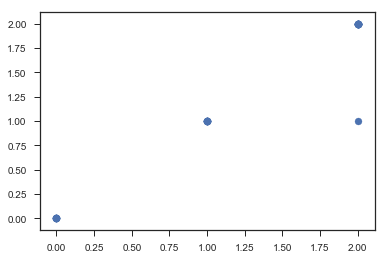

In [8]:
print(Y1)
print(Y_pred)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(Y1, Y_pred)
plt.show()

In [9]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [10]:
def print_figure( XX, YY, xx, yy, Y, Y_pred = False ):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    print(type(Y_pred))
    if isinstance(Y_pred, np.ndarray):
        ax.contourf(xx, yy, Y_pred,  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(XX, YY, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')

    plt.show()

<class 'numpy.ndarray'>


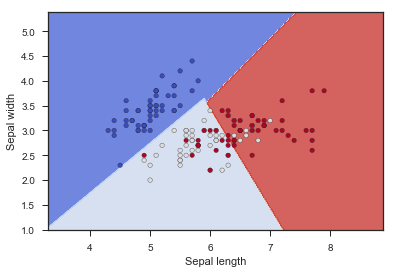

In [12]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors

C = 2.0  # SVM regularization parameter

from sklearn.svm import *

models = { 'SVC with linear kernel'    : SVC(kernel='linear', C=C),
           'LinearSVC (linear kernel)' : LinearSVC(C=C, max_iter=10000),
           'SVC with RBF kernel'       : SVC(kernel='rbf', gamma=0.7, C=C),
           'SVC with polynomial (degree 3) kernel' : SVC(kernel='poly', degree=3, gamma='auto', C=C) }

title = 'SVC with linear kernel' 
#title = 'LinearSVC (linear kernel)'
#title = 'SVC with RBF kernel'
#title = 'SVC with polynomial (degree 3) kernel' 

model = models[title]

sepal_len, sepal_wid, petal_len, petal_wid = X.T

X_train = np.c_[sepal_len, sepal_wid]
Y_train = iris_data.target

model.fit(X_train, Y_train)

xx, yy = make_meshgrid(sepal_len, sepal_wid)

Y_pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
Y_pred = Y_pred.reshape(xx.shape)

print_figure( sepal_len, sepal_wid, xx, yy, Y, Y_pred )

# PRINCIPAL COMPONENT ANALYSIS

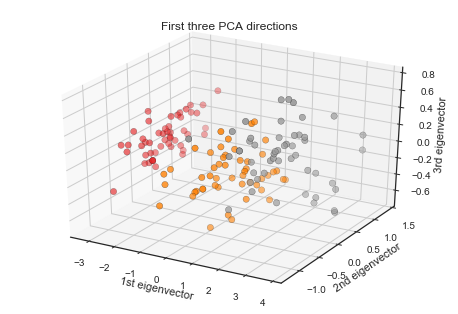

In [20]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data 
y = iris.target

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure()
ax = Axes3D(fig)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

plt.show()
